# Final project: Python for Data Science 
## Author: Aura MORENO VEGA
### Dataset: Heart Disease from the UCI  (Univerisity of California Irvine)


## Description of Project

I have used the **UCI's Heart Disease dataset**, containing 13 different attributes for patients that present or not heart disease. 

I decided to use a **decision tree classifier** in order to determine if a **patient** could **present** or not heart **disease** based on such different available attributes.

In [1]:
#Donwload dataset either from:

##Kaggle:
#https://www.kaggle.com/ronitf/heart-disease-uci

##UCI repository: This is useful for detailed information on attributes
#https://archive.ics.uci.edu/ml/datasets/heart+disease



## Description of Dataset: 

The dataset contains information for 303 patients, colected in different Institutions/Hospitals.

I used the dataset from the Cleveland Clinic, USA.

The are 13 attributes per patient, and a 14th attribute indicating whether the patient presented or not heart disease.

The 13 attributes per patient are:

    1.age
    2.sex (1 = male, 0 = female)
    3.cp: Chest pain type (4 values)
    4.trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
    5.col: Serum cholestoral in mg/dl
    6.fbs: Fasting blood sugar (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    7.restecg: Resting electrocardiographic results (values 0,1,2)
    8.thalach: Maximum heart rate achieved
    9.exang: Exercise induced angina
    10.oldpeak: ST depression induced by exercise relative to rest
    11.slope: The slope of the peak exercise ST segment
    12.ca: Number of major vessels (0-3) colored by flouroscopy
    13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


### Import necessary libraries for this notebook

In [2]:
#Import libraries to be used throughout analysis
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Step 1: Retrieve dataset

In [3]:
#Donwload dataset from Kaggle
# Data Source: https://www.kaggle.com/ronitf/heart-disease-uci
# File: 'heart.csv'

#Load original file
heart = pd.read_csv('./heart.csv')
#Make a copy for analysis
heartdata=heart.copy()

In [4]:
#Explore size of data:
#Confirm that we have 303 patients and 14 attributes
heartdata.shape

(303, 14)

In [5]:
#Visualize attributes of data:
#Note: According to the description of the data:the last column (14th column), named "target":
#indicates the presence (1) or abscence(0) of heart disease for such patient
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Step 2: Clean and explore dataset

### Missing values

In [6]:
#Before describing data, check if there are any missing values

#Check for each individual attributes (would there be an attribute for which there are a lot of missing values?)
heartdata.isnull().sum()



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Check for patients (are there patients that have missing information for any of the attributes?)
#Will check if there any missing values per patient and sort output
heartdata.isnull().sum(axis=1).sort_values(ascending=False)

0      0
208    0
206    0
205    0
204    0
      ..
100    0
99     0
98     0
97     0
302    0
Length: 303, dtype: int64

In [8]:
#There appears to be no missing values:
#so just to verify one last time, will do a sum of the sum of any missing values
#This gives info if there is any missing value in the whole data frame
heartdata.isnull().sum().sum()

0

### Exploration of dataset attributes

In [9]:
#Get an idea of dataset statistics:
heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


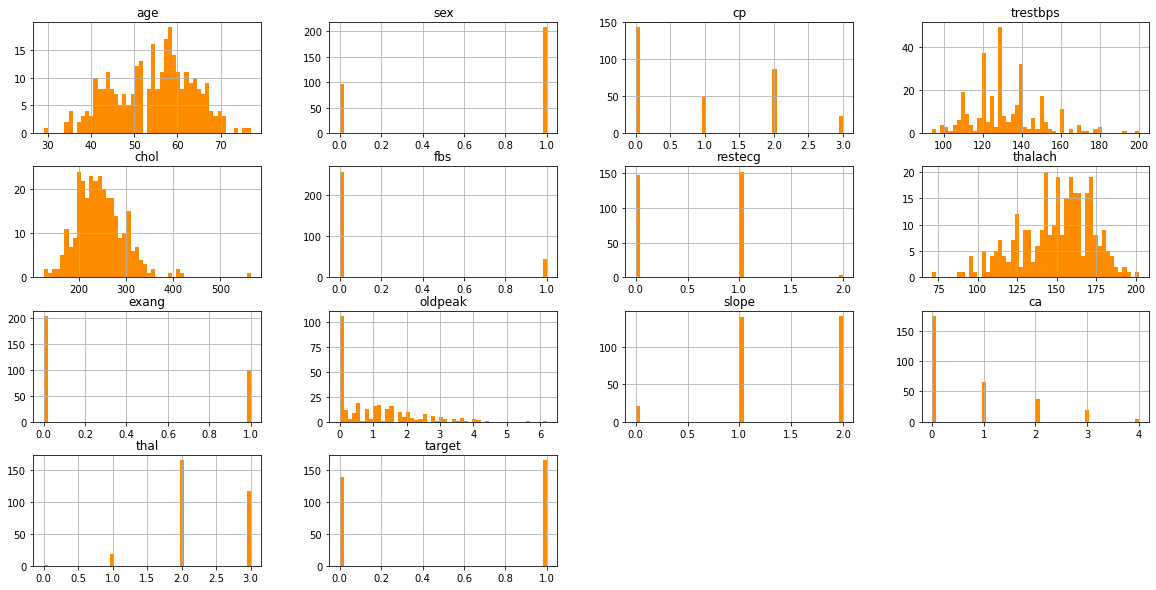

In [10]:
#Plot histograms of distribution for each attribute in order to better visualize data
#This is important in order to see if there would be skewed data that were to be used in the decision tree classifier

#Create a function that will plot a histogram for each of the 13 attributes:
#Use the seaborn library for plotting

heartdata.hist(figsize=(20,10),bins = 50,color='darkorange')
plt.ylabel("Frequency")
plt.savefig("Att_distribution.png",orientation='landscape',bbox_inches='tight')
plt.show()

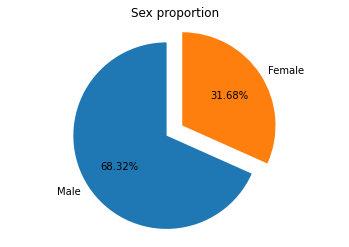

In [11]:
#We see that there are more men than women (men are declared as "1").
#heartdata.sex.value_counts() #There are 207 male vs 96 females

#This is something that should be taken into account 

#Plot a pie chart representing the percentages of males and females

labels=['Male', 'Female']
plt.pie(heartdata.sex.value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%', startangle=90)
plt.title('Sex proportion')
plt.axis('equal')
plt.savefig("Sex_distribution-pie.png",orientation='landscape',bbox_inches='tight')
plt.show()


### Explore presence of heart disease

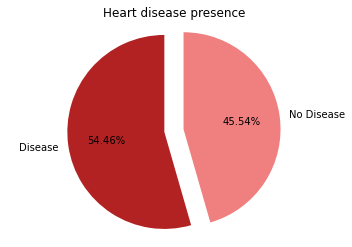

In [12]:
#Althoug we can already see it on the histogram,
#Plot a pie chart with percentages to better visualize percentage of patients presenting disease:
labels=['Disease', 'No Disease']
plt.pie(heartdata.target.value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%', colors=['firebrick','lightcoral'],startangle=90)
plt.title('Heart disease presence')
plt.axis('equal')
plt.savefig("Target_distribution-pie.png",orientation='landscape',bbox_inches='tight')
plt.show()


### Explore attributes and their correlation with heart disease outcome

When predicting heart disease, it may appear interesting to look at attributes which are highly correlated. However, other attributes which may not appear as strongly correlated when looked at individually, may actually be important for the prediction when taken together as a group.  

I will compare the prediction accuracy between models trained with these two different kinds of features. 

In [13]:
#Calculate pearson correlation between all attributes to see 
#which are the most correlated to disease presence ("target" attribute)
heartdata.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


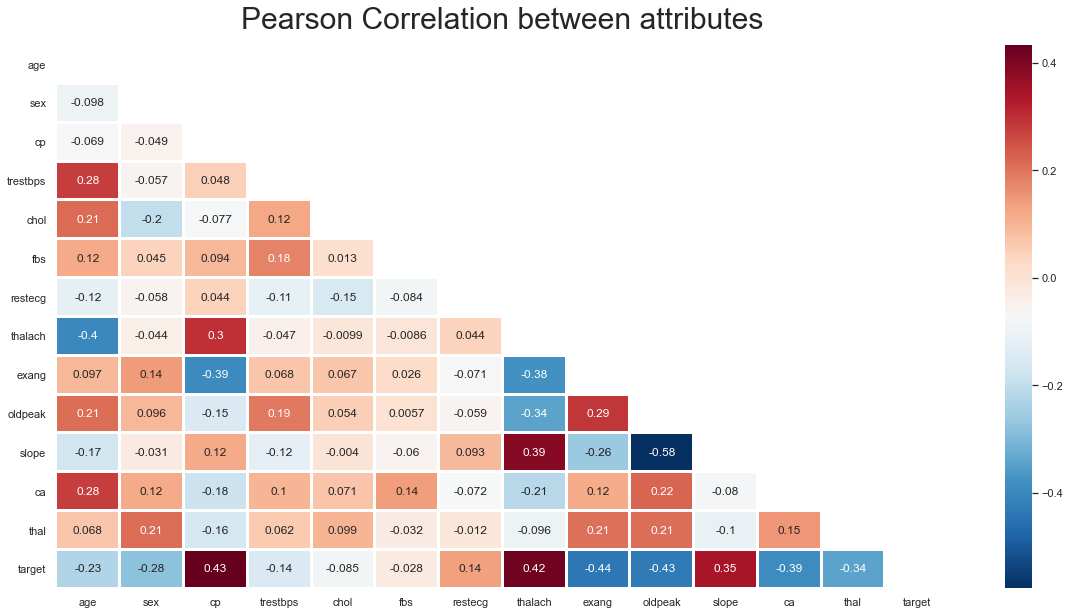

In [14]:
#In order to better visualize results from correlation table, plot as a diagonal correlation diagram
#Use seaborn library to create this plot

#Define style and size of figure
sns.set_theme(style="white")
plt.figure(figsize=(20, 10))

#Generate a mask in order to just plot lower triangle of corr diagram
mask = np.triu(np.ones_like(heartdata.corr(), dtype=np.bool))


heatmap = sns.heatmap(heartdata.corr(), mask=mask,annot=True, cmap='RdBu_r', linewidths = 2)
heatmap.set_title('Pearson Correlation between attributes', fontdict={'fontsize':30}, pad=16)
plt.savefig("Heatmap-att.png",orientation='landscape',bbox_inches='tight')

From correlation matrix we can observe that the attributes that come out as the most and least correlated to the disease presence ("target") are:

Most correlated:

    *cp: Chest Pain
    *thalach: Person's maximum heart rate achieved
    *slope: Slope of the peak exercise ST segment

Least correlated:

    *exang: Exercise induced angina
    *oldpeak: ST depression induced by exercise relative to rest
    *ca: Number of major vessels colored by fluoroscopy

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


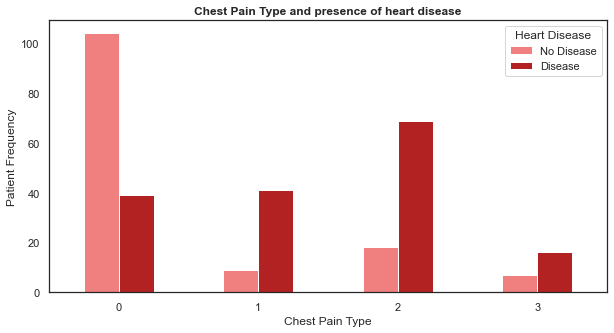

In [15]:
#Plot individual graphs for  strongly correlated attributes against disease presence for better visualization:

#For Cp:
#Use crosstab from pandas which allow to create a cross tabulation table from two series

print(pd.crosstab(heartdata.cp,heartdata.target))

##Cp
pd.crosstab(heartdata.cp,heartdata.target).plot(kind="bar",figsize=(10,5),color=['lightcoral','firebrick' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Patient Frequency')
plt.legend(['No Disease','Disease'],title="Heart Disease")
plt.title("Chest Pain Type and presence of heart disease",fontweight="bold")
plt.savefig("Cp-target.png",orientation='landscape',bbox_inches='tight')
plt.show()




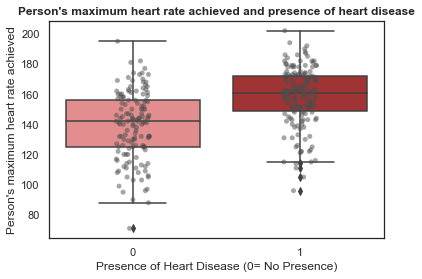

In [16]:
##Thalach vs disease presence:

#Since Thalach has many continuous values, need to use boxplot rather than frequency plot to compare

g=sns.boxplot(data=heartdata,x='target' ,y='thalach', palette = ["lightcoral","firebrick"])
plt.xticks(rotation = 0)
plt.title("Person's maximum heart rate achieved and presence of heart disease",fontweight="bold")
#Add values as points in boxplots to better look at distribution of samples:
g = sns.stripplot(data=heartdata,x='target' ,y='thalach', color=".3",alpha=0.5)
plt.xlabel("Presence of Heart Disease (0= No Presence)")
plt.ylabel("Person's maximum heart rate achieved")
plt.savefig("Thalach-target.png",orientation='landscape',bbox_inches='tight')
plt.show()




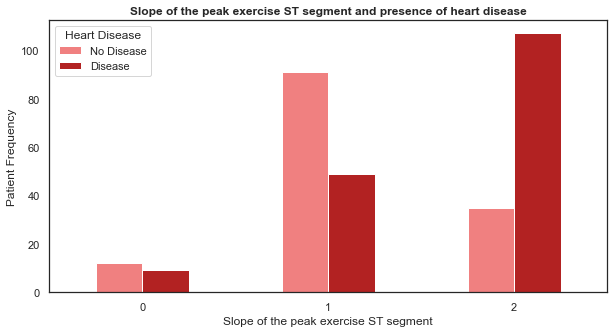

In [17]:
##Slope: Slope of the peak exercise ST segment

#Since we have discrete values, plot as bar:

pd.crosstab(heartdata.slope,heartdata.target).plot(kind="bar",figsize=(10,5),color=['lightcoral','firebrick' ])
plt.xlabel('Slope of the peak exercise ST segment')
plt.xticks(rotation = 0)
plt.ylabel('Patient Frequency')
plt.legend(['No Disease','Disease'],title="Heart Disease")
plt.title("Slope of the peak exercise ST segment and presence of heart disease",fontweight="bold")
plt.savefig("Slope-target.png",orientation='landscape',bbox_inches='tight')
plt.show()

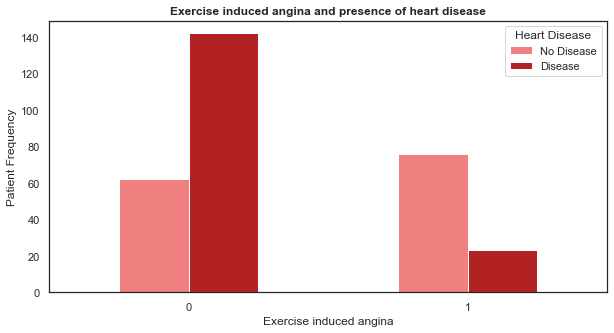

In [18]:
##exang: Exercise induced angina

#Since we have discrete values, plot as bar:

pd.crosstab(heartdata.exang,heartdata.target).plot(kind="bar",figsize=(10,5),color=['lightcoral','firebrick' ])
plt.xlabel('Exercise induced angina')
plt.xticks(rotation = 0)
plt.ylabel('Patient Frequency')
plt.legend(['No Disease','Disease'],title="Heart Disease")
plt.title("Exercise induced angina and presence of heart disease",fontweight="bold")
plt.savefig("Exang-target.png",orientation='landscape',bbox_inches='tight')
plt.show()

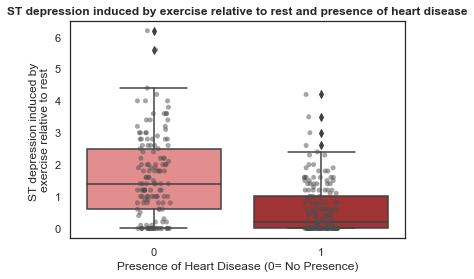

In [19]:
##Oldpeak vs disease presence:

#Since Oldpeak has many continuous values, need to use boxplot rather than frequency plot to compare

g=sns.boxplot(data=heartdata,x='target' ,y='oldpeak', palette = ["lightcoral","firebrick"])
plt.xticks(rotation = 0)
plt.title("ST depression induced by exercise relative to rest and presence of heart disease",fontweight="bold")
#Add values as points in boxplots to better look at distribution of samples:
g = sns.stripplot(data=heartdata,x='target' ,y='oldpeak', color=".3",alpha=0.5)
plt.xlabel("Presence of Heart Disease (0= No Presence)")
plt.ylabel("ST depression induced by \nexercise relative to rest")
plt.savefig("oldpeak-target.png",orientation='landscape',bbox_inches='tight')
plt.show()


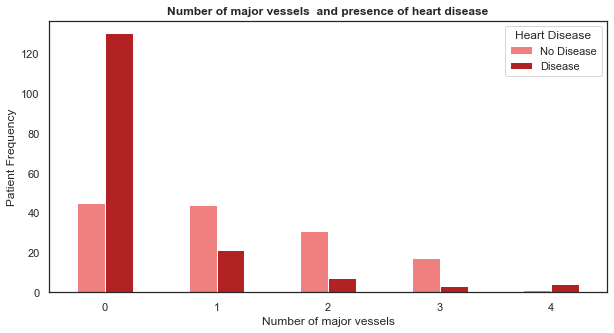

In [20]:
##ca vs disease presence:

pd.crosstab(heartdata.ca,heartdata.target).plot(kind="bar",figsize=(10,5),color=['lightcoral','firebrick' ])
plt.xlabel('Number of major vessels')
plt.xticks(rotation = 0)
plt.ylabel('Patient Frequency')
plt.legend(['No Disease','Disease'],title="Heart Disease")
plt.title("Number of major vessels  and presence of heart disease",fontweight="bold")
plt.savefig("ca-target.png",orientation='landscape',bbox_inches='tight')
plt.show()



## Step 3: Decision Tree

As mentioned before, it could be interesting to build a decision tree using features that are:  

1. Strongly correlated to heart disease. 
2. Invidually not strongly correlated to heart disease.
 
I will firstly train the decision tree with the set of strongly correlated features, and the compare to training with (ii) a set of non correlated features and to (iii) a mixture of both. 

### Training Phase

In [21]:
#For easier visualization of results, convert numerical indicator of heart disease into text:
heartdata["HDisease"]= np.where(heartdata['target']== 1, "Disease", "NoDisease")

#Check it worked
heartdata.head(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,HDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Disease
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Disease


In [22]:
heartdata.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,HDisease
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,NoDisease
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,NoDisease


In [23]:
#Define target to be predicted (Y):
y=heartdata[['HDisease']].copy()
print(y.columns)
y.head


Index(['HDisease'], dtype='object')


<bound method NDFrame.head of       HDisease
0      Disease
1      Disease
2      Disease
3      Disease
4      Disease
..         ...
298  NoDisease
299  NoDisease
300  NoDisease
301  NoDisease
302  NoDisease

[303 rows x 1 columns]>

In [24]:
#Define set of features to use for prediction
print("Sets of features to train Decision Tree for prediction\n--------")

#Set1: Features strongly correlated to heart disease
features=['cp','thalach','slope','exang','oldpeak','ca']
print("Set1-Features strongly correlated to heart disease: {} ".format(features))

#Set2: Features not strongly correlated to heart disease
features2=heartdata.columns.tolist()
features2=list(set(features2)-set(features))
#Take out target and HDisease from list
features2=list(set(features2) - set(['target','HDisease']))
print("Set2-Features not strongly correlated to heart disease: {} ".format(features2))

Sets of features to train Decision Tree for prediction
--------
Set1-Features strongly correlated to heart disease: ['cp', 'thalach', 'slope', 'exang', 'oldpeak', 'ca'] 
Set2-Features not strongly correlated to heart disease: ['chol', 'age', 'trestbps', 'thal', 'fbs', 'restecg', 'sex'] 


In [25]:
#Define X and visualize columns were subset correctly
X = heartdata[features].copy()
display(X)

,cp,thalach,slope,exang,oldpeak,ca
0,3,150,0,0,2.3,0
1,2,187,0,0,3.5,0
2,1,172,2,0,1.4,0
3,1,178,2,0,0.8,0
4,0,163,2,1,0.6,0
...,...,...,...,...,...,...
298,0,123,1,1,0.2,0
299,3,132,1,0,1.2,0
300,0,141,1,0,3.4,2
301,0,115,1,1,1.2,1


### Function for prediction: 3 steps:  

1. Define tratinig set and split test set
2. Fit on training set
3. Get accuracy score  

In [26]:
#Create a function where we can choose features to train model with:

def DTreefun(X,y,tsize=0.33,ranstate=324,Max_leaf_nodes=10,ranstateclass=0,accuracy_detailed=False):
    
    #1.Define tratinig set and split test set:
    ##########################################
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=ranstate)

    print(f'Number of samples in dataset: {len(X)}')
    print(f'Number of samples in training dataset: {len(X_train)}')
    
    #2.Fit on training set:
    #####################
    heartdisease_classifier = DecisionTreeClassifier(max_leaf_nodes=Max_leaf_nodes, random_state=ranstateclass)
    heartdisease_classifier.fit(X_train, y_train)
    
    #3.Get accuracy score:
    #####################
    predictions = heartdisease_classifier.predict(X_test)
    acc_score=accuracy_score(y_true = y_test, y_pred = predictions)
    
    if accuracy_detailed is True:
        from sklearn.metrics import classification_report
        print(classification_report(predictions, y_test))
    else:
        print("Accuracy score is {} ".format(acc_score))
        

### Prediction using strongly correlated features:

In [27]:
X = heartdata[features].copy()
y = heartdata[['HDisease']].copy()
DTreefun(X,y,tsize=0.33,ranstate=324,Max_leaf_nodes=10,ranstateclass=0)


#Note: I carried out first the decision tree classifier without indicating max leaf nodes
#In this way the max number of depth is achieved. This resulted in an accuracy score of 0.8,
#lower than when up to max 10 nodes are chosen

Number of samples in dataset: 303
Number of samples in training dataset: 203
Accuracy score is 0.83 


From the [sklearn website](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), there is a function that enables to measure more in detail the accuray of the classification.

This report includes, per predicted classification the:

    * Precision: "Ability of the classifier not to label as positive a sample that is negative"
    * Recall: "Ability of the classifier to find all the positive samples"
    * F1-score: "Harmonic mean of precision and recall. The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0"
    

In [28]:
DTreefun(X,y,tsize=0.33,ranstate=324,Max_leaf_nodes=10,ranstateclass=0,accuracy_detailed=True)

Number of samples in dataset: 303
Number of samples in training dataset: 203
              precision    recall  f1-score   support

     Disease       0.93      0.79      0.85        63
   NoDisease       0.72      0.89      0.80        37

    accuracy                           0.83       100
   macro avg       0.82      0.84      0.82       100
weighted avg       0.85      0.83      0.83       100



### Prediction using weakly correlated features:

In [29]:
#Using all other non-strongly correlated features
X = heartdata[features2].copy()
y = heartdata[['HDisease']].copy()
DTreefun(X,y,tsize=0.33,ranstate=324,Max_leaf_nodes=10,ranstateclass=0,accuracy_detailed=True)


Number of samples in dataset: 303
Number of samples in training dataset: 203
              precision    recall  f1-score   support

     Disease       0.74      0.77      0.75        52
   NoDisease       0.74      0.71      0.72        48

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



In [30]:
#Using features that would be not as weakly correlated
features3=['age','sex','restecg','thal']
X = heartdata[features3].copy()
y = heartdata[['HDisease']].copy()
DTreefun(X,y,tsize=0.33,ranstate=324,Max_leaf_nodes=10,ranstateclass=0,accuracy_detailed=True)

Number of samples in dataset: 303
Number of samples in training dataset: 203
              precision    recall  f1-score   support

     Disease       0.67      0.69      0.68        52
   NoDisease       0.65      0.62      0.64        48

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



### Prediction using strongly and weakly correlated features

In [31]:
#Biological reason: could age and cholesterol levels contribute to a better prediction if combined with strongly correlated features?
features4=features+['age','chol']
X = heartdata[features4].copy()
y = heartdata[['HDisease']].copy()
DTreefun(X,y,tsize=0.33,ranstate=324,Max_leaf_nodes=10,ranstateclass=0,accuracy_detailed=True)

Number of samples in dataset: 303
Number of samples in training dataset: 203
              precision    recall  f1-score   support

     Disease       0.94      0.80      0.86        64
   NoDisease       0.72      0.92      0.80        36

    accuracy                           0.84       100
   macro avg       0.83      0.86      0.83       100
weighted avg       0.86      0.84      0.84       100



### Validation randomly selecting features: 

In [34]:
all_features=features+features2
randfeatures=random.sample(all_features, 6)
print(randfeatures)
X = heartdata[randfeatures].copy()
y = heartdata[['HDisease']].copy()
DTreefun(X,y,tsize=0.33,ranstate=324,Max_leaf_nodes=10,ranstateclass=0,accuracy_detailed=True)

['oldpeak', 'slope', 'thal', 'sex', 'age', 'restecg']
Number of samples in dataset: 303
Number of samples in training dataset: 203
              precision    recall  f1-score   support

     Disease       0.70      0.76      0.73        50
   NoDisease       0.74      0.68      0.71        50

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



## Step 4: Conclusion

I found that the attributes that appeared to be the most correlated (positively or negatively) to heart disease in the set of 303 patients from the Cleveland Clinic are:

* Chest Pain
* Person's maximum heart rate achieved 
* Slope of the peak exercise ST segment
* Exercise induced angina
* ST depression induced by exercise relative to rest
* Number of major vessels

Using such features, I  built a Decision tree classification model that performed with an average accuracy of 0.82, and an average ability to find all true positive samples of 0.84.  

I also compared the prediction when taking weakly correlated features.
* **If only taking weakly correlated features:** The model fared less well.
* When **combining** certain **biologically relevant features** combined **to strongly correlated features:** 
    Taking age and cholesterol levels (features initially not so strongly correlated when evaluated individually), combined to the previous strongly correlated features resulted in a **better accuracy**: Average accuracy of 0.83; Average ability to find true positive samples:0.86.

This demonstrates that it is important to not only evaluate highly correlated features to the outcome we wish to predict. 